<a href="https://colab.research.google.com/github/RAHUL-B-PILLAI/coursework_heart_disease_pridiction/blob/main/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


source: 'https://www.kaggle.com/fedesoriano/heart-failure-prediction'

In [ ]:
from google.colab import files
upload= files.upload()

Saving heart.csv to heart.csv


In [ ]:
# Using pands to read csv file
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# showing number of records and attributes
data.shape

(918, 12)

In [ ]:
# Looking for null value in records
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#data.drop(['ST_Slope','ExerciseAngina','RestingECG','ChestPainType','Sex'],axis=1,inplace=True)
#  
from sklearn import preprocessing
label= preprocessing.LabelEncoder()
data1=data.copy()
for i in data.columns[data1.dtypes=='object']:
  data1[i]=label.fit_transform(data[i])
data1.tail(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
911,59,1,0,164,176,1,0,90,0,1.0,1,1
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


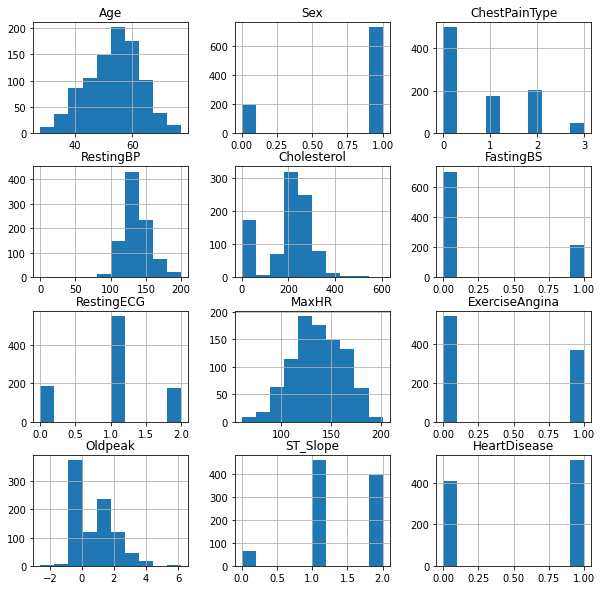

In [ ]:
#plt.figure(figsize=(100,100))
data1.hist(figsize=(10,10))
plt.show()

In [ ]:
data1.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
#get account of those with heart disease 
data1['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
# showinng correlation between attributes
abs(data1.corr()['HeartDisease']).sort_values(ascending=False)

HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.400421
ChestPainType     0.386828
Sex               0.305445
Age               0.282039
FastingBS         0.267291
Cholesterol       0.232741
RestingBP         0.107589
RestingECG        0.057384
Name: HeartDisease, dtype: float64

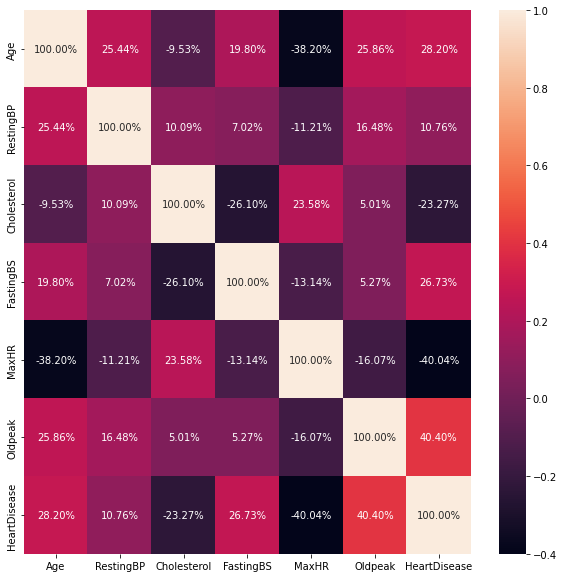

In [ ]:
# showing heatmap representation of correlation between attributes
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.2%')
plt.show()

In [ ]:
abs(data1.corr()['HeartDisease']).nlargest(6)

HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.400421
ChestPainType     0.386828
Name: HeartDisease, dtype: float64

In [ ]:
#data1='Age','FastingBS','Cholesterol','RestingBP','RestingECG' 
data1.drop(['Age','FastingBS','Cholesterol','RestingBP','RestingECG','Sex','ChestPainType','MaxHR'],axis=1,inplace=True)


In [ ]:

X,Y=data1.iloc[:,:-1].values,data1.iloc[:,-1].values


In [ ]:
#from skearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


kmeans = KMeans(n_clusters=2, random_state=35).fit_predict(X)

ypred=kmeans

print(accuracy_score(Y,ypred))

0.593681917211329


In [ ]:
print(classification_report(Y,ypred))

              precision    recall  f1-score   support

           0       0.53      0.95      0.68       410
           1       0.88      0.31      0.46       508

    accuracy                           0.59       918
   macro avg       0.70      0.63      0.57       918
weighted avg       0.72      0.59      0.55       918



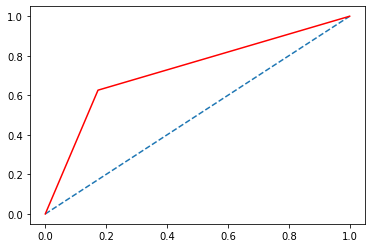

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#proabs=model2.predict_proba(X2_test)
#probs=proabs[:,1]
#print(probs)
auc=roc_auc_score(Y,ypred)
fpr,tpr,threshold=roc_curve(Y,ypred)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,color="red")

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.80,random_state=45)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y=dt.predict(x_test)
accuracy_score(y,y_test)

0.8097826086956522